In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [27]:
import numpy as np
import os
import pickle as p
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx

In [3]:
path_1 = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs/"
#folder = "/0/graphs/"
#path = "/home/rohit/PhD_Work/stage_nathan/data/simu_graph/noise_50,outliers_20/0/graphs/"
#directory = os.listdir("/home/rohit/PhD_Work/stage_nathan/data/simu_graph/noise_50,outliers_20/0/graphs")

In [4]:
def mean_edge_len(G):
    
    all_geo = [z['geodesic_distance'] for x,y,z in list(G.edges.data())]
    mean_geo = np.array(all_geo).mean()
    std = np.std(all_geo)
    
    return mean_geo,std,all_geo

In [5]:
# G = p.load(open(path_1+"graph_0.gpickle", "rb" ))

# geo_dis, std_dist = mean_edge_len(G)

In [6]:
def mean_edge_len_real_gr(path):
    
    mean_geo = []
    mean_std = []
    geo_dist_arr = []
    
    for graph in os.listdir(path):
        
        G = p.load(open(path+graph, "rb" )) #read the graphs
            
        geo_dis, std_dist,all_geo = mean_edge_len(G) # mean geodesic distance of a real graph            

        mean_geo.append(np.mean(geo_dis)) # mean of mean geodesic distance
        mean_std.append(std_dist) # mean standard deviation
        geo_dist_arr.append(np.array(all_geo))
        
    return mean_geo,mean_std,np.array(geo_dist_arr)

In [7]:
def remove_dummy_nodes(graph):
    G = graph.copy()
    to_remove = []
    for (p, d) in G.nodes(data=True):
        if d['is_dummy'] == True:
            to_remove.append(p)
    G.remove_nodes_from(to_remove)
    return G

In [8]:
mean_geo,mean_std,all_geo_arr = mean_edge_len_real_gr(path_1)

In [9]:
no_of_real_G = len([graph for graph in os.listdir(path_1)])
no_of_real_G =  np.arange(0, no_of_real_G, 1)

In [10]:
# data_is = {'noise_params':noise_params,'mean_geo':mean_geo}
# df = pd.DataFrame(data_is, columns=['noise_params','mean_geo'])

# df = df.sort_values(by=['noise_params'])

# noise_params = df['noise_params'].values.tolist()
# mean_geo = df['mean_geo'].values.tolist()

In [11]:
# plt.plot(no_of_real_G,mean_geo,'-o',c='red')
# plt.title("Mean_edge_length Real Graphs")
# plt.xlabel('graphs')
# plt.ylabel('Mean edge length')

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = no_of_real_G,y = mean_geo,mode='lines+markers'))
fig.show()

Text(0, 0.5, 'Mean edge length')

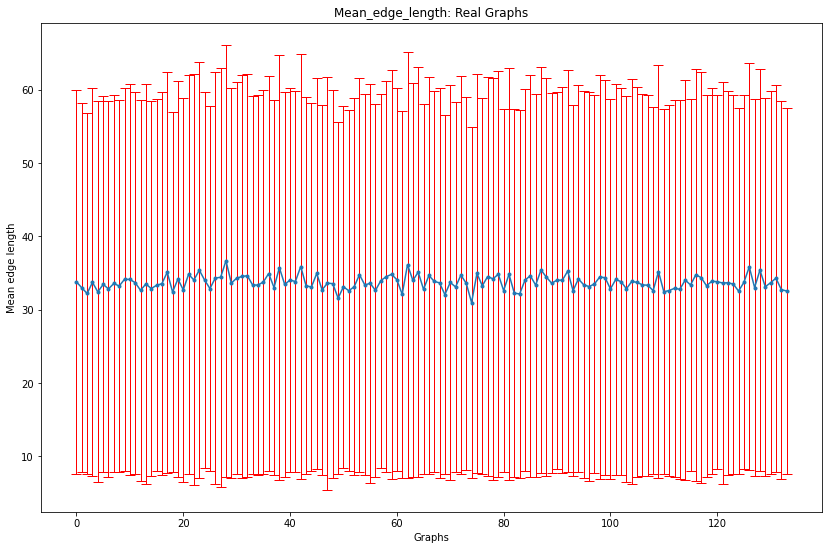

In [30]:
plt.figure(figsize=(14,9))
plt.errorbar(no_of_real_G,mean_geo,mean_std, linestyle='-', marker='.',ecolor='r',capsize=5,elinewidth=1)
plt.title("Mean_edge_length: Real Graphs")
plt.xlabel('Graphs')
plt.ylabel('Mean edge length')

Text(0, 0.5, 'Density')

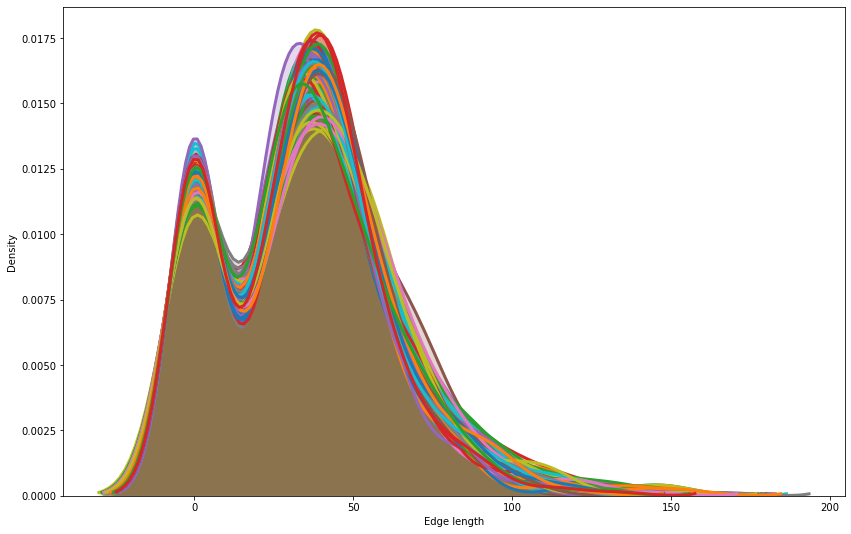

In [31]:
plt.figure(figsize=(14,9))
for arr in all_geo_arr:
    sns.distplot(arr, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel('Edge length')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

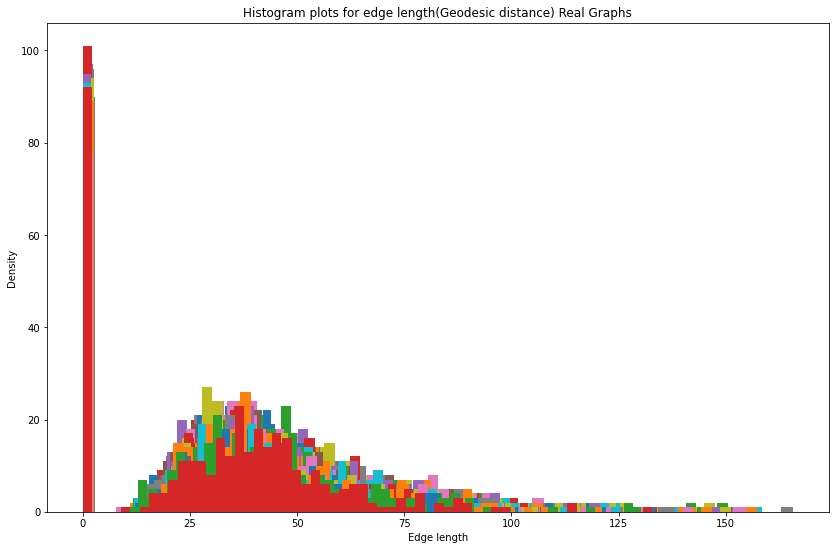

In [69]:
plt.figure(figsize=(14,9))
for arr in all_geo_arr:
    plt.hist(arr, bins = 60)
plt.title("Histogram plots for edge length(Geodesic distance) Real Graphs")
plt.xlabel('Edge length')
plt.ylabel('Density')

In [62]:
#list(G.nodes.data())[86:]

In [36]:
def compute_avg_basin_area_betwn_nodes(G):
    average_area = []
    for x,y in list(G.edges):
        area_x = G.nodes.data()[x]['basin_area']
        area_y = G.nodes.data()[y]['basin_area']
        average_area.append(np.mean([area_x,area_y]))
    return average_area

In [37]:
def create_avg_area_vs_edge_len(path):
    
    all_graphs_avg_area = []
    geo_dist_arr = []
    
    for graph in os.listdir(path):
        
        G = p.load(open(path + graph, "rb" )) #read the graphs
            
        avg_area = compute_avg_basin_area_betwn_nodes(G) # avg basin area of a real graph.
        
        geo_dis, std_dist,all_geo = mean_edge_len(G) # mean geodesic distance of a real graph.

        all_graphs_avg_area.append(np.array(avg_area)) 
        geo_dist_arr.append(np.array(all_geo))
        
    return np.array(all_graphs_avg_area),np.array(geo_dist_arr)

In [38]:
all_graphs_avg_area, geo_dist_arr = create_avg_area_vs_edge_len(path_1)

Text(0, 0.5, 'Average Edge Length')

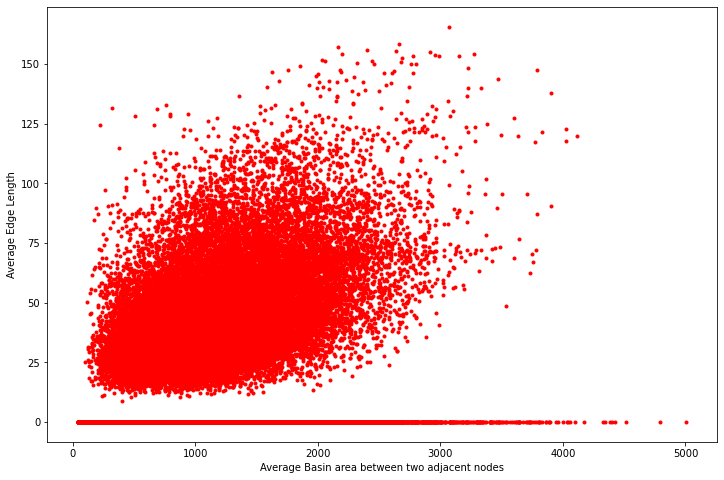

In [39]:
plt.figure(figsize=(12,8))
for x,y in zip(all_graphs_avg_area,geo_dist_arr):
    plt.scatter(x,y,c='r',marker='.')
plt.xlabel('Average Basin area between two adjacent nodes')
plt.ylabel('Average Edge Length')

In [62]:
graph_name = [graph_name for graph_name in os.listdir(path_1)]

In [118]:
edge_len_df = pd.DataFrame(0, index=np.arange(389),columns=graph_name)

In [157]:
#edge_len_df.at[0:len(arr),graph_name[0]]= geo_dist_arr[0]

In [45]:
fig = go.Figure()
for x,y in zip(all_graphs_avg_area,geo_dist_arr):
    fig.add_trace(go.Scatter(x=x, y=y,
                    mode='markers'))
fig.show()

Text(0, 0.5, 'Density')

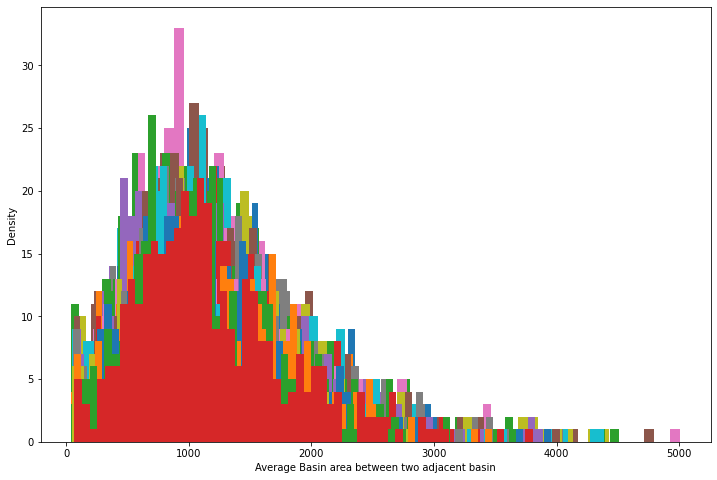

In [102]:
plt.figure(figsize=(12,8))
for arr in all_graphs_avg_area:
    plt.hist(arr, bins = 60)
plt.xlabel('Average Basin area between two adjacent basin')
plt.ylabel('Density')

In [133]:
# for graph in os.listdir(path_1):
#     G = p.load(open(path_1 + graph, "rb" ))
#     for i in list(G.nodes.data())[:70]:
#         if i[1]['basin_area'] >= 4000:
#             print(i[1]['basin_area'])

In [136]:
G.nodes.data()[0]

{'vertex_index': 2935,
 'sphere_3dcoords': array([ 21.19021988, -92.98861694, -30.06811714]),
 'sphere_coords': [-1.3467426300048828, 1.8762030601501465],
 'basin_label': 295.0,
 'basin_area': 790.788,
 'depth': -0.61794525,
 'basin_thickness': 2.1981778144836426,
 'ico100_7_vertex_index': 20325,
 'is_dummy': False,
 'label_dbscan': 0}

Text(0, 0.5, 'Edge Length')

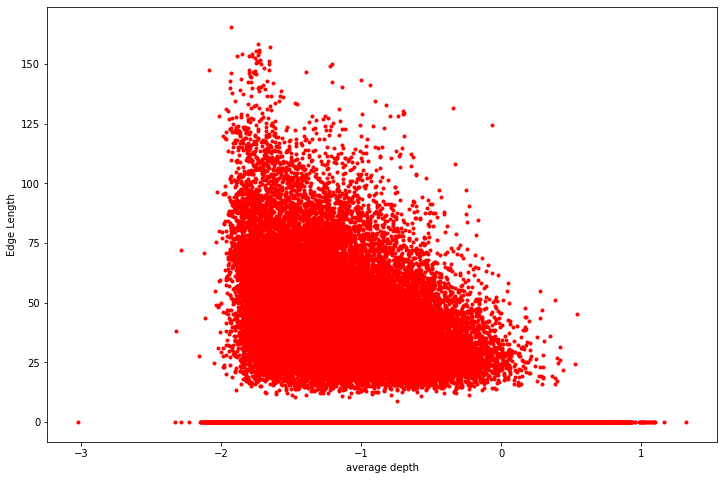

In [146]:
plt.figure(figsize=(12,8))
for x,y in zip(all_graphs_avg_area,geo_dist_arr):
    plt.scatter(x,y,c='r',marker='.')
plt.xlabel('average depth')
plt.ylabel('Edge Length')

In [48]:
for 